# VacationPy
----

#### Note
* Keep an eye on your API usage. Use https://developers.google.com/maps/reporting/gmp-reporting as reference for how to monitor your usage and billing.

* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

# Import API key
from api_keys import g_key

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [2]:

cities_df = pd.read_csv('../output_data/cities_t.csv')
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,44.60,76,40,18.41,AR,1618933038
1,Mataura,-46.1927,168.8643,48.99,84,39,1.99,NZ,1618933038
2,Nikolskoye,59.7035,30.7861,54.00,26,0,11.18,RU,1618933039
3,Beringovskiy,63.0500,179.3167,9.88,93,23,4.68,RU,1618933039
4,Arraial do Cabo,-22.9661,-42.0278,80.60,69,20,28.77,BR,1618933039
...,...,...,...,...,...,...,...,...,...
557,Kirakira,-10.4544,161.9205,79.61,84,92,5.95,SB,1618933234
558,Bose,45.4612,8.0137,66.20,24,20,4.61,IT,1618933235
559,Nyurba,63.2842,118.3319,-3.68,99,52,3.58,RU,1618933235
560,Puerto Rondón,6.2805,-71.1000,91.38,38,58,10.33,CO,1618933235


### Humidity Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations and Humidity as the weight.
* Add Heatmap layer to map.

In [3]:
gmaps.configure(api_key=g_key)
locations = cities_df[['Lat', 'Lng']].astype(float)
humidity = cities_df['Humidity'].astype(float)

In [4]:
# Create a poverty Heatmap layer
figure_layout = {
    'width': '1000px',
    'height': '1000px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
    }
fig = gmaps.figure(figure_layout)

heat_layer = gmaps.heatmap_layer(locations, weights=humidity)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

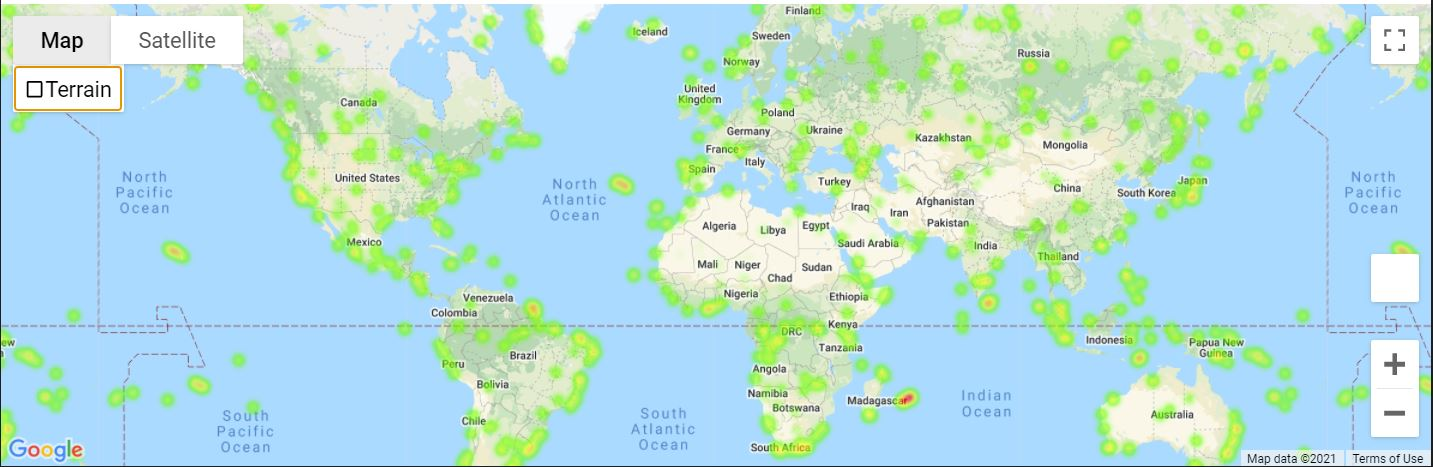

In [21]:
#include screenshot of heatmap - Screenshot saved in Challenge - Vacation PY folder

from IPython.display import Image
Image(filename = 'humidity_heat.jpg')

### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

In [5]:
cities_temp_df = cities_df[(cities_df['Max Temp'] >= 70) & (cities_df['Max Temp'] <= 80)]
cities_temp_ws_df = cities_temp_df[(cities_temp_df['Wind Speed'] < 10) & (cities_temp_df['Cloudiness'] == 0)]
# cities_temp_df.to_csv('../output_data/cities_maxtemp.csv', index=False)
cities_temp_ws_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
42,Cape Town,-33.9258,18.4232,73.00,60,0,8.05,ZA,1618932916
163,Pisco,-13.7000,-76.2167,71.60,73,0,5.75,PE,1618933096
232,Boa Esperança,-21.0900,-45.5658,75.07,51,0,6.64,BR,1618933026
386,Tura,25.5198,90.2201,75.27,43,0,4.52,IN,1618933173
397,Rundu,-17.9333,19.7667,74.93,31,0,4.85,NaN,1618933176
492,Young,-32.6833,-57.6333,75.00,61,0,8.01,UY,1618933211
552,Gobabis,-22.4500,18.9667,72.73,22,0,7.76,NaN,1618933232


### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [6]:
hotel_df = cities_temp_ws_df.reset_index()
hotel_df

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,42,Cape Town,-33.9258,18.4232,73.00,60,0,8.05,ZA,1618932916
1,163,Pisco,-13.7000,-76.2167,71.60,73,0,5.75,PE,1618933096
2,232,Boa Esperança,-21.0900,-45.5658,75.07,51,0,6.64,BR,1618933026
3,386,Tura,25.5198,90.2201,75.27,43,0,4.52,IN,1618933173
4,397,Rundu,-17.9333,19.7667,74.93,31,0,4.85,NaN,1618933176
5,492,Young,-32.6833,-57.6333,75.00,61,0,8.01,UY,1618933211
6,552,Gobabis,-22.4500,18.9667,72.73,22,0,7.76,NaN,1618933232


In [8]:
hotel_df['Hotel Name'] = ''
# params dictionary to update each iteration
params = {
    "radius": 5000,
    "types": "Hotel",
    "keyword": "hotel",
    "key": g_key
}

# Use the lat/lng we recovered to identify airports
for index, row in hotel_df.iterrows():
    # get lat, lng from df
    lat = row["Lat"]
    lng = row["Lng"]
    
    # change location each iteration while leaving original params in place
    params["location"] = f"{lat},{lng}"

        # Use the search term: "International Airport" and our lat/lng
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    # make request and print url
    hotel = requests.get(base_url, params=params).json()
   
    try:
        hotel_df.loc[index, 'Hotel Name'] = hotel["results"][0]["name"]
    except:
        print(f'Missing cities {lat}, {lng}')
hotel_df

Missing cities -32.6833, -57.6333


,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hotel Name
0,42,Cape Town,-33.9258,18.4232,73.00,60,0,8.05,ZA,1618932916,Atlanticview Cape Town Boutique Hotel
1,163,Pisco,-13.7000,-76.2167,71.60,73,0,5.75,PE,1618933096,Hostal Tambo Colorado
2,232,Boa Esperança,-21.0900,-45.5658,75.07,51,0,6.64,BR,1618933026,JHS Palace Hotel
3,386,Tura,25.5198,90.2201,75.27,43,0,4.52,IN,1618933173,"Dongrama Home Stay, Tura Meghalaya"
4,397,Rundu,-17.9333,19.7667,74.93,31,0,4.85,NaN,1618933176,Hakusembe River Lodge
5,492,Young,-32.6833,-57.6333,75.00,61,0,8.01,UY,1618933211,
6,552,Gobabis,-22.4500,18.9667,72.73,22,0,7.76,NaN,1618933232,Goba Lodge


In [9]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]
hotel_info
locations = hotel_df[["Lat", "Lng"]]

In [10]:
# Add marker layer ontop of heat map
locations1 = cities_df[['Lat', 'Lng']].astype(float)
humidity1 = cities_df['Humidity'].astype(float)
# hotel1 = hotel_df('Hotel Name').astype(str)
figure_layout = {
    'width': '1000px',
    'height': '700px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
    }
fig = gmaps.figure(figure_layout)

heat_layer = gmaps.heatmap_layer(locations1, weights=humidity1)
marker = gmaps.marker_layer(locations, info_box_content=[f"Nearest Hotel: {hotel}" for hotel in hotel_info])

fig.add_layer(marker)
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

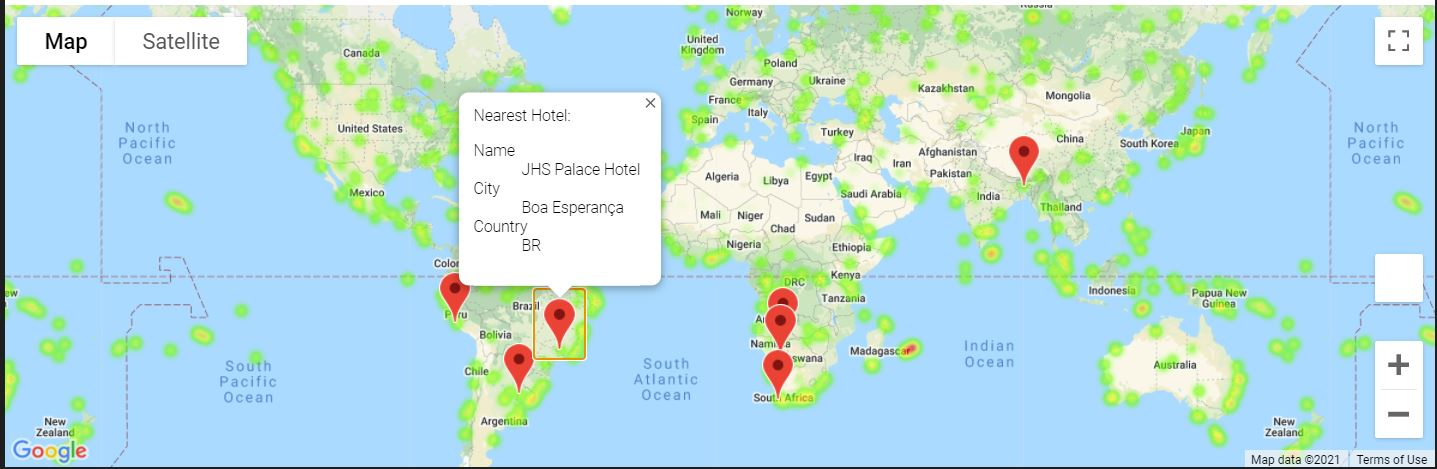

In [20]:
#include screenshot of heatmap - Screenshot saved in Challenge - Vacation PY folder
from IPython.display import Image
Image(filename = 'hotel_humidity.jpg')

